<a href="https://colab.research.google.com/github/braxtonowens/OneraDataset/blob/master/sentielsat_wrapper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Process Data Script

This Script uses the sentinelsat python library to retrive new Sentinel 2 images using the Copurnicus API from a GeoJson defined by the user to make a before and after image of that location. For now the GoeJason must be one location, thus the output will only be two new images that can be saved to a local drive. The dates of the before and after images should be defined in a txt file with format:

![alt text](https://i.ibb.co/FxRMb81/Capture.png)

You will be prompted to upload these files when the program is run.

Note that the program will search for images within a 2 day buffer. If more days are needed feel free to change  it.





In [ ]:
!pip install sentinelsat

Upload the GeoJason file that defines the area you wish to take from the API  

In [ ]:
from google.colab import files

geojson = files.upload()

Saving saclay_e.geojson to saclay_e.geojson


Upload dates file and reads it

In [ ]:
from google.colab import files

dates = files.upload()


f = open(list(dates.keys())[0], "r")
newdate1 = f.readline().split()
newdate2 = f.readline().split()

Saving dates.txt to dates.txt


Import libraries and Connect to the API

In [ ]:
from sentinelsat.sentinel import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import *
import pandas as pd
import os
from osgeo import gdal

user = 'usernamehere'
password = 'passwordhere'

api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')

Here we turn the string into a date object

In [ ]:
date1 = datetime.strptime(newdate1[1],'%Y%m%d')
date2 = datetime.strptime(newdate2[1],'%Y%m%d')

Finds and downloads Sentinel 2 images with desired atributes. Look at these two links for more paramaters for iamge query. 

[Full Text Search](https://scihub.copernicus.eu/twiki/do/view/SciHubUserGuide/FullTextSearch?redirectedfrom=SciHubUserGuide.3FullTextSearch)

[API Reference](https://sentinelsat.readthedocs.io/en/stable/api.html#module-sentinelsat)

top products found:  d32576ba-cb93-4e62-98ef-aaf2d0c6d189    S2A_MSIL1C_20191202T105421_N0208_R051_T31UDP_2...
ce1dac10-d141-4d91-ad36-45802a31ae5b    S2A_MSIL2A_20191202T105421_N0213_R051_T31UDP_2...
393deaa4-d47a-4a86-b8ca-b694bf6b1f27    S2B_MSIL1C_20191107T105139_N0208_R051_T31UDQ_2...
ca68f1d5-0d0c-4045-b60f-622067a6021f    S2B_MSIL1C_20191107T105139_N0208_R051_T31UDP_2...
4256f720-ecb3-43ff-b27f-deac2deb58e0    S2B_MSIL2A_20191107T105139_N0213_R051_T31UDQ_2...
2f7a5742-9314-46de-983f-ac6ad0f6fb7e    S2A_MSIL1C_20191202T105421_N0208_R051_T31UDQ_2...
5564b6ce-be0b-41ce-8cd5-56476d0f87a5    S2B_MSIL2A_20191107T105139_N0213_R051_T31UDP_2...
9896d662-6f15-43f0-a312-fd086d16771b    S2A_MSIL1C_20191125T110401_N0208_R094_T31UDQ_2...
73a0918f-cd04-40a5-929b-884ea0798189    S2A_MSIL2A_20191125T110401_N0213_R094_T31UDQ_2...
7e653a2d-129d-44f0-a92a-9fc0c5d4b48f    S2A_MSIL2A_20191202T105421_N0213_R051_T31UDQ_2...
dceb43fd-d46a-424b-a16e-178fce6926c1    S2B_MSIL1C_20191207T105329_N0208_R051_T

Downloading: 100%|██████████| 833M/833M [04:01<00:00, 3.45MB/s]
MD5 checksumming: 100%|██████████| 833M/833M [00:01<00:00, 430MB/s]


['S2A_MSIL1C_20191202T105421_N0208_R051_T31UDP_20191202T112708.SAFE/GRANULE/L1C_T31UDP_A023214_20191202T105436/IMG_DATA/T31UDP_20191202T105421_B06.tif', 'S2A_MSIL1C_20191202T105421_N0208_R051_T31UDP_20191202T112708.SAFE/GRANULE/L1C_T31UDP_A023214_20191202T105436/IMG_DATA/T31UDP_20191202T105421_B08.tif', 'S2A_MSIL1C_20191202T105421_N0208_R051_T31UDP_20191202T112708.SAFE/GRANULE/L1C_T31UDP_A023214_20191202T105436/IMG_DATA/T31UDP_20191202T105421_B09.tif', 'S2A_MSIL1C_20191202T105421_N0208_R051_T31UDP_20191202T112708.SAFE/GRANULE/L1C_T31UDP_A023214_20191202T105436/IMG_DATA/T31UDP_20191202T105421_B02.tif', 'S2A_MSIL1C_20191202T105421_N0208_R051_T31UDP_20191202T112708.SAFE/GRANULE/L1C_T31UDP_A023214_20191202T105436/IMG_DATA/T31UDP_20191202T105421_B01.tif', 'S2A_MSIL1C_20191202T105421_N0208_R051_T31UDP_20191202T112708.SAFE/GRANULE/L1C_T31UDP_A023214_20191202T105436/IMG_DATA/T31UDP_20191202T105421_B12.tif', 'S2A_MSIL1C_20191202T105421_N0208_R051_T31UDP_20191202T112708.SAFE/GRANULE/L1C_T31UDP_A

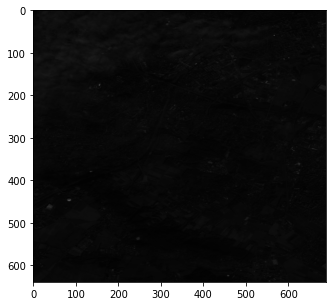

{'id': 'ce1dac10-d141-4d91-ad36-45802a31ae5b', 'title': 'S2A_MSIL2A_20191202T105421_N0213_R051_T31UDP_20191202T122334', 'size': 1149160945, 'md5': '83511D0824329261690F3AE049F902B1', 'date': datetime.datetime(2019, 12, 2, 10, 54, 21, 24000), 'footprint': 'POLYGON((1.639176802247361 48.74497768846318,3.132782609970735 48.75293650976542,3.130248809843976 47.765092664464426,1.665135068084716 47.757403531734624,1.639176802247361 48.74497768846318))', 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('ce1dac10-d141-4d91-ad36-45802a31ae5b')/$value", 'Online': True, 'Creation Date': datetime.datetime(2019, 12, 2, 19, 23, 4, 34000), 'Ingestion Date': datetime.datetime(2019, 12, 2, 19, 21, 46, 643000), 'Aot retrieval accuracy': 0.0, 'Cloud cover percentage': 0.695701, 'Cloud shadow percentage': 1.112274, 'Dark features percentage': 18.764479, 'Date': datetime.datetime(2019, 12, 2, 10, 54, 21, 24000), 'Degraded ancillary data percentage': 0.0, 'Degraded MSI data percentage': 0, 'Filena

Downloading: 100%|██████████| 1.15G/1.15G [04:16<00:00, 4.49MB/s]
MD5 checksumming: 100%|██████████| 1.15G/1.15G [00:02<00:00, 423MB/s]


['S2A_MSIL2A_20191202T105421_N0213_R051_T31UDP_20191202T122334.SAFE/GRANULE/L2A_T31UDP_A023214_20191202T105436/IMG_DATA/R10m/T31UDP_20191202T105421_B02_10m.tif', 'S2A_MSIL2A_20191202T105421_N0213_R051_T31UDP_20191202T122334.SAFE/GRANULE/L2A_T31UDP_A023214_20191202T105436/IMG_DATA/R10m/T31UDP_20191202T105421_B03_10m.tif', 'S2A_MSIL2A_20191202T105421_N0213_R051_T31UDP_20191202T122334.SAFE/GRANULE/L2A_T31UDP_A023214_20191202T105436/IMG_DATA/R10m/T31UDP_20191202T105421_B04_10m.tif', 'S2A_MSIL2A_20191202T105421_N0213_R051_T31UDP_20191202T122334.SAFE/GRANULE/L2A_T31UDP_A023214_20191202T105436/IMG_DATA/R10m/T31UDP_20191202T105421_B08_10m.tif', 'S2A_MSIL2A_20191202T105421_N0213_R051_T31UDP_20191202T122334.SAFE/GRANULE/L2A_T31UDP_A023214_20191202T105436/IMG_DATA/R10m/T31UDP_20191202T105421_AOT_10m.tif', 'S2A_MSIL2A_20191202T105421_N0213_R051_T31UDP_20191202T122334.SAFE/GRANULE/L2A_T31UDP_A023214_20191202T105436/IMG_DATA/R10m/T31UDP_20191202T105421_WVP_10m.tif', 'S2A_MSIL2A_20191202T105421_N0213

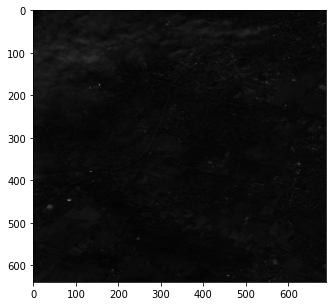

{'id': '393deaa4-d47a-4a86-b8ca-b694bf6b1f27', 'title': 'S2B_MSIL1C_20191107T105139_N0208_R051_T31UDQ_20191107T120225', 'size': 860027751, 'md5': '50AF4F948C65D7A8383D105416AC6B75', 'date': datetime.datetime(2019, 11, 7, 10, 51, 39, 25000), 'footprint': 'POLYGON((1.614272368185704 49.64443007346099,3.135213595780942 49.652643868751746,3.132551327123652 48.66495515183609,1.641546225080212 48.6570207750582,1.614272368185704 49.64443007346099))', 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('393deaa4-d47a-4a86-b8ca-b694bf6b1f27')/$value", 'Online': True, 'Creation Date': datetime.datetime(2019, 11, 7, 15, 13, 39, 797000), 'Ingestion Date': datetime.datetime(2019, 11, 7, 15, 12, 38, 534000), 'Cloud cover percentage': 14.1577, 'Datatake sensing start': datetime.datetime(2019, 11, 7, 10, 51, 39, 25000), 'Date': datetime.datetime(2019, 11, 7, 10, 51, 39, 25000), 'Degraded ancillary data percentage': 0.0, 'Degraded MSI data percentage': 0, 'Filename': 'S2B_MSIL1C_20191107T105139

Downloading: 100%|██████████| 860M/860M [03:53<00:00, 3.68MB/s]
MD5 checksumming: 100%|██████████| 860M/860M [00:02<00:00, 421MB/s]


['S2B_MSIL1C_20191107T105139_N0208_R051_T31UDQ_20191107T120225.SAFE/GRANULE/L1C_T31UDQ_A013948_20191107T105655/IMG_DATA/T31UDQ_20191107T105139_B07.tif', 'S2B_MSIL1C_20191107T105139_N0208_R051_T31UDQ_20191107T120225.SAFE/GRANULE/L1C_T31UDQ_A013948_20191107T105655/IMG_DATA/T31UDQ_20191107T105139_B01.tif', 'S2B_MSIL1C_20191107T105139_N0208_R051_T31UDQ_20191107T120225.SAFE/GRANULE/L1C_T31UDQ_A013948_20191107T105655/IMG_DATA/T31UDQ_20191107T105139_B05.tif', 'S2B_MSIL1C_20191107T105139_N0208_R051_T31UDQ_20191107T120225.SAFE/GRANULE/L1C_T31UDQ_A013948_20191107T105655/IMG_DATA/T31UDQ_20191107T105139_B04.tif', 'S2B_MSIL1C_20191107T105139_N0208_R051_T31UDQ_20191107T120225.SAFE/GRANULE/L1C_T31UDQ_A013948_20191107T105655/IMG_DATA/T31UDQ_20191107T105139_B10.tif', 'S2B_MSIL1C_20191107T105139_N0208_R051_T31UDQ_20191107T120225.SAFE/GRANULE/L1C_T31UDQ_A013948_20191107T105655/IMG_DATA/T31UDQ_20191107T105139_B8A.tif', 'S2B_MSIL1C_20191107T105139_N0208_R051_T31UDQ_20191107T120225.SAFE/GRANULE/L1C_T31UDQ_A

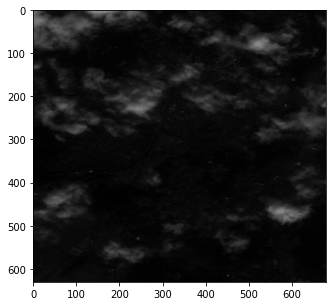

{'id': 'ca68f1d5-0d0c-4045-b60f-622067a6021f', 'title': 'S2B_MSIL1C_20191107T105139_N0208_R051_T31UDP_20191107T120225', 'size': 851924152, 'md5': 'B49706DE9AA0AB2E9612BE3806881BC6', 'date': datetime.datetime(2019, 11, 7, 10, 51, 39, 25000), 'footprint': 'POLYGON((1.639176802247361 48.74497768846318,3.132782609970735 48.75293650976542,3.130248809843976 47.765092664464426,1.665135068084716 47.757403531734624,1.639176802247361 48.74497768846318))', 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('ca68f1d5-0d0c-4045-b60f-622067a6021f')/$value", 'Online': True, 'Creation Date': datetime.datetime(2019, 11, 7, 15, 13, 36, 451000), 'Ingestion Date': datetime.datetime(2019, 11, 7, 15, 12, 1, 485000), 'Cloud cover percentage': 16.7269, 'Datatake sensing start': datetime.datetime(2019, 11, 7, 10, 51, 39, 25000), 'Date': datetime.datetime(2019, 11, 7, 10, 51, 39, 25000), 'Degraded ancillary data percentage': 0.0, 'Degraded MSI data percentage': 0, 'Filename': 'S2B_MSIL1C_20191107T10513

Downloading: 100%|██████████| 852M/852M [02:55<00:00, 4.86MB/s]
MD5 checksumming: 100%|██████████| 852M/852M [00:02<00:00, 425MB/s]


['S2B_MSIL1C_20191107T105139_N0208_R051_T31UDP_20191107T120225.SAFE/GRANULE/L1C_T31UDP_A013948_20191107T105655/IMG_DATA/T31UDP_20191107T105139_B08.tif', 'S2B_MSIL1C_20191107T105139_N0208_R051_T31UDP_20191107T120225.SAFE/GRANULE/L1C_T31UDP_A013948_20191107T105655/IMG_DATA/T31UDP_20191107T105139_B01.tif', 'S2B_MSIL1C_20191107T105139_N0208_R051_T31UDP_20191107T120225.SAFE/GRANULE/L1C_T31UDP_A013948_20191107T105655/IMG_DATA/T31UDP_20191107T105139_B12.tif', 'S2B_MSIL1C_20191107T105139_N0208_R051_T31UDP_20191107T120225.SAFE/GRANULE/L1C_T31UDP_A013948_20191107T105655/IMG_DATA/T31UDP_20191107T105139_B02.tif', 'S2B_MSIL1C_20191107T105139_N0208_R051_T31UDP_20191107T120225.SAFE/GRANULE/L1C_T31UDP_A013948_20191107T105655/IMG_DATA/T31UDP_20191107T105139_TCI.tif', 'S2B_MSIL1C_20191107T105139_N0208_R051_T31UDP_20191107T120225.SAFE/GRANULE/L1C_T31UDP_A013948_20191107T105655/IMG_DATA/T31UDP_20191107T105139_B09.tif', 'S2B_MSIL1C_20191107T105139_N0208_R051_T31UDP_20191107T120225.SAFE/GRANULE/L1C_T31UDP_A

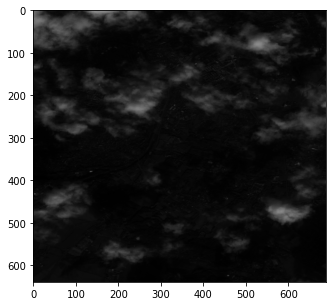

{'id': '4256f720-ecb3-43ff-b27f-deac2deb58e0', 'title': 'S2B_MSIL2A_20191107T105139_N0213_R051_T31UDQ_20191107T125325', 'size': 1156898177, 'md5': 'EF5FC67201798C30ADEFB7FCCD2C24EC', 'date': datetime.datetime(2019, 11, 7, 10, 51, 39, 25000), 'footprint': 'POLYGON((1.614272368185704 49.64443007346099,3.135213595780942 49.652643868751746,3.132551327123652 48.66495515183609,1.641546225080212 48.6570207750582,1.614272368185704 49.64443007346099))', 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('4256f720-ecb3-43ff-b27f-deac2deb58e0')/$value", 'Online': True, 'Creation Date': datetime.datetime(2019, 11, 7, 18, 46, 6, 827000), 'Ingestion Date': datetime.datetime(2019, 11, 7, 18, 45, 22, 111000), 'Aot retrieval accuracy': 0.0, 'Cloud cover percentage': 28.949786, 'Cloud shadow percentage': 14.142022, 'Dark features percentage': 5.178139, 'Date': datetime.datetime(2019, 11, 7, 10, 51, 39, 25000), 'Degraded ancillary data percentage': 0.0, 'Degraded MSI data percentage': 0, 'Filena

Downloading: 100%|██████████| 1.16G/1.16G [03:56<00:00, 4.90MB/s]
MD5 checksumming: 100%|██████████| 1.16G/1.16G [00:02<00:00, 397MB/s]


['S2B_MSIL2A_20191107T105139_N0213_R051_T31UDQ_20191107T125325.SAFE/GRANULE/L2A_T31UDQ_A013948_20191107T105655/IMG_DATA/R10m/T31UDQ_20191107T105139_B08_10m.tif', 'S2B_MSIL2A_20191107T105139_N0213_R051_T31UDQ_20191107T125325.SAFE/GRANULE/L2A_T31UDQ_A013948_20191107T105655/IMG_DATA/R10m/T31UDQ_20191107T105139_WVP_10m.tif', 'S2B_MSIL2A_20191107T105139_N0213_R051_T31UDQ_20191107T125325.SAFE/GRANULE/L2A_T31UDQ_A013948_20191107T105655/IMG_DATA/R10m/T31UDQ_20191107T105139_B02_10m.tif', 'S2B_MSIL2A_20191107T105139_N0213_R051_T31UDQ_20191107T125325.SAFE/GRANULE/L2A_T31UDQ_A013948_20191107T105655/IMG_DATA/R10m/T31UDQ_20191107T105139_B03_10m.tif', 'S2B_MSIL2A_20191107T105139_N0213_R051_T31UDQ_20191107T125325.SAFE/GRANULE/L2A_T31UDQ_A013948_20191107T105655/IMG_DATA/R10m/T31UDQ_20191107T105139_TCI_10m.tif', 'S2B_MSIL2A_20191107T105139_N0213_R051_T31UDQ_20191107T125325.SAFE/GRANULE/L2A_T31UDQ_A013948_20191107T105655/IMG_DATA/R10m/T31UDQ_20191107T105139_B04_10m.tif', 'S2B_MSIL2A_20191107T105139_N0213

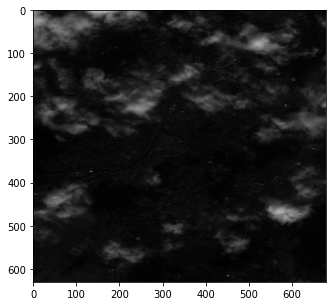

{'id': '2f7a5742-9314-46de-983f-ac6ad0f6fb7e', 'title': 'S2A_MSIL1C_20191202T105421_N0208_R051_T31UDQ_20191202T112708', 'size': 841227399, 'md5': 'F3044714A1B7F3396247E472F4BD5649', 'date': datetime.datetime(2019, 12, 2, 10, 54, 21, 24000), 'footprint': 'POLYGON((1.614272368185704 49.64443007346099,3.135213595780942 49.652643868751746,3.132551327123652 48.66495515183609,1.641546225080212 48.6570207750582,1.614272368185704 49.64443007346099))', 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('2f7a5742-9314-46de-983f-ac6ad0f6fb7e')/$value", 'Online': True, 'Creation Date': datetime.datetime(2019, 12, 2, 15, 9, 7, 501000), 'Ingestion Date': datetime.datetime(2019, 12, 2, 15, 8, 32, 186000), 'Cloud cover percentage': 33.5139, 'Datatake sensing start': datetime.datetime(2019, 12, 2, 10, 54, 21, 24000), 'Date': datetime.datetime(2019, 12, 2, 10, 54, 21, 24000), 'Degraded ancillary data percentage': 0.0, 'Degraded MSI data percentage': 0, 'Filename': 'S2A_MSIL1C_20191202T105421_N0

Downloading: 100%|██████████| 841M/841M [03:07<00:00, 4.48MB/s]
MD5 checksumming: 100%|██████████| 841M/841M [00:02<00:00, 416MB/s]


['S2A_MSIL1C_20191202T105421_N0208_R051_T31UDQ_20191202T112708.SAFE/GRANULE/L1C_T31UDQ_A023214_20191202T105436/IMG_DATA/T31UDQ_20191202T105421_B09.tif', 'S2A_MSIL1C_20191202T105421_N0208_R051_T31UDQ_20191202T112708.SAFE/GRANULE/L1C_T31UDQ_A023214_20191202T105436/IMG_DATA/T31UDQ_20191202T105421_B03.tif', 'S2A_MSIL1C_20191202T105421_N0208_R051_T31UDQ_20191202T112708.SAFE/GRANULE/L1C_T31UDQ_A023214_20191202T105436/IMG_DATA/T31UDQ_20191202T105421_B04.tif', 'S2A_MSIL1C_20191202T105421_N0208_R051_T31UDQ_20191202T112708.SAFE/GRANULE/L1C_T31UDQ_A023214_20191202T105436/IMG_DATA/T31UDQ_20191202T105421_TCI.tif', 'S2A_MSIL1C_20191202T105421_N0208_R051_T31UDQ_20191202T112708.SAFE/GRANULE/L1C_T31UDQ_A023214_20191202T105436/IMG_DATA/T31UDQ_20191202T105421_B07.tif', 'S2A_MSIL1C_20191202T105421_N0208_R051_T31UDQ_20191202T112708.SAFE/GRANULE/L1C_T31UDQ_A023214_20191202T105436/IMG_DATA/T31UDQ_20191202T105421_B05.tif', 'S2A_MSIL1C_20191202T105421_N0208_R051_T31UDQ_20191202T112708.SAFE/GRANULE/L1C_T31UDQ_A

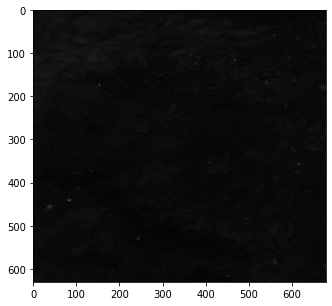

{'id': '5564b6ce-be0b-41ce-8cd5-56476d0f87a5', 'title': 'S2B_MSIL2A_20191107T105139_N0213_R051_T31UDP_20191107T125325', 'size': 1134783653, 'md5': '9449426761D5FA61AE98B9CEDF353618', 'date': datetime.datetime(2019, 11, 7, 10, 51, 39, 25000), 'footprint': 'POLYGON((1.639176802247361 48.74497768846318,3.132782609970735 48.75293650976542,3.130248809843976 47.765092664464426,1.665135068084716 47.757403531734624,1.639176802247361 48.74497768846318))', 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('5564b6ce-be0b-41ce-8cd5-56476d0f87a5')/$value", 'Online': True, 'Creation Date': datetime.datetime(2019, 11, 7, 18, 33, 7, 696000), 'Ingestion Date': datetime.datetime(2019, 11, 7, 18, 31, 23, 654000), 'Aot retrieval accuracy': 0.0, 'Cloud cover percentage': 33.555143, 'Cloud shadow percentage': 15.763187, 'Dark features percentage': 4.845057, 'Date': datetime.datetime(2019, 11, 7, 10, 51, 39, 25000), 'Degraded ancillary data percentage': 0.0, 'Degraded MSI data percentage': 0, 'File

Downloading: 100%|██████████| 1.13G/1.13G [04:34<00:00, 4.14MB/s]
MD5 checksumming: 100%|██████████| 1.13G/1.13G [00:02<00:00, 383MB/s]


['S2B_MSIL2A_20191107T105139_N0213_R051_T31UDP_20191107T125325.SAFE/GRANULE/L2A_T31UDP_A013948_20191107T105655/IMG_DATA/R10m/T31UDP_20191107T105139_TCI_10m.tif', 'S2B_MSIL2A_20191107T105139_N0213_R051_T31UDP_20191107T125325.SAFE/GRANULE/L2A_T31UDP_A013948_20191107T105655/IMG_DATA/R10m/T31UDP_20191107T105139_B04_10m.tif', 'S2B_MSIL2A_20191107T105139_N0213_R051_T31UDP_20191107T125325.SAFE/GRANULE/L2A_T31UDP_A013948_20191107T105655/IMG_DATA/R10m/T31UDP_20191107T105139_WVP_10m.tif', 'S2B_MSIL2A_20191107T105139_N0213_R051_T31UDP_20191107T125325.SAFE/GRANULE/L2A_T31UDP_A013948_20191107T105655/IMG_DATA/R10m/T31UDP_20191107T105139_B08_10m.tif', 'S2B_MSIL2A_20191107T105139_N0213_R051_T31UDP_20191107T125325.SAFE/GRANULE/L2A_T31UDP_A013948_20191107T105655/IMG_DATA/R10m/T31UDP_20191107T105139_B02_10m.tif', 'S2B_MSIL2A_20191107T105139_N0213_R051_T31UDP_20191107T125325.SAFE/GRANULE/L2A_T31UDP_A013948_20191107T105655/IMG_DATA/R10m/T31UDP_20191107T105139_AOT_10m.tif', 'S2B_MSIL2A_20191107T105139_N0213

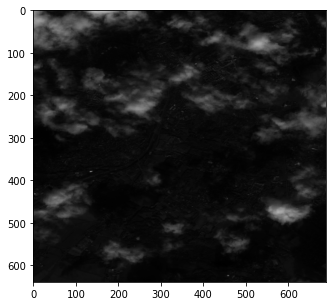

{'id': '9896d662-6f15-43f0-a312-fd086d16771b', 'title': 'S2A_MSIL1C_20191125T110401_N0208_R094_T31UDQ_20191125T112328', 'size': 618687465, 'md5': 'D8CA8E1092D6EF2EC1D65CBCCD14865E', 'date': datetime.datetime(2019, 11, 25, 11, 4, 1, 25000), 'footprint': 'POLYGON((2.969207260992456 49.65174735675892,2.915795518818078 49.541866723433294,2.846576304370795 49.39719455346863,2.777617606398048 49.25262675853502,2.709284408061792 49.10800747541145,2.641634754820656 48.96333212595048,2.573956285037979 48.818774828136746,2.506837192621727 48.67409558406657,2.501088086980119 48.66159482311433,1.641546225080212 48.6570207750582,1.614272368185704 49.64443007346099,2.969207260992456 49.65174735675892))', 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('9896d662-6f15-43f0-a312-fd086d16771b')/$value", 'Online': True, 'Creation Date': datetime.datetime(2019, 11, 25, 13, 8, 4, 876000), 'Ingestion Date': datetime.datetime(2019, 11, 25, 13, 7, 15, 770000), 'Cloud cover percentage': 35.0497, 'D

Downloading: 100%|██████████| 619M/619M [03:33<00:00, 2.90MB/s]
MD5 checksumming: 100%|██████████| 619M/619M [00:01<00:00, 420MB/s]


['S2A_MSIL1C_20191125T110401_N0208_R094_T31UDQ_20191125T112328.SAFE/GRANULE/L1C_T31UDQ_A023114_20191125T110440/IMG_DATA/T31UDQ_20191125T110401_B01.tif', 'S2A_MSIL1C_20191125T110401_N0208_R094_T31UDQ_20191125T112328.SAFE/GRANULE/L1C_T31UDQ_A023114_20191125T110440/IMG_DATA/T31UDQ_20191125T110401_B05.tif', 'S2A_MSIL1C_20191125T110401_N0208_R094_T31UDQ_20191125T112328.SAFE/GRANULE/L1C_T31UDQ_A023114_20191125T110440/IMG_DATA/T31UDQ_20191125T110401_B06.tif', 'S2A_MSIL1C_20191125T110401_N0208_R094_T31UDQ_20191125T112328.SAFE/GRANULE/L1C_T31UDQ_A023114_20191125T110440/IMG_DATA/T31UDQ_20191125T110401_B02.tif', 'S2A_MSIL1C_20191125T110401_N0208_R094_T31UDQ_20191125T112328.SAFE/GRANULE/L1C_T31UDQ_A023114_20191125T110440/IMG_DATA/T31UDQ_20191125T110401_B10.tif', 'S2A_MSIL1C_20191125T110401_N0208_R094_T31UDQ_20191125T112328.SAFE/GRANULE/L1C_T31UDQ_A023114_20191125T110440/IMG_DATA/T31UDQ_20191125T110401_TCI.tif', 'S2A_MSIL1C_20191125T110401_N0208_R094_T31UDQ_20191125T112328.SAFE/GRANULE/L1C_T31UDQ_A

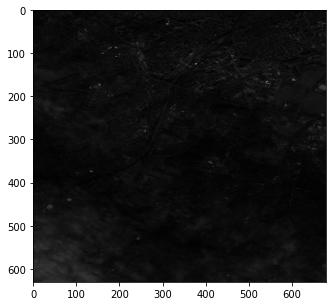

{'id': '73a0918f-cd04-40a5-929b-884ea0798189', 'title': 'S2A_MSIL2A_20191125T110401_N0213_R094_T31UDQ_20191125T120931', 'size': 842958171, 'md5': 'D401D9A059EB4DB1E04B5FFFD4BF4096', 'date': datetime.datetime(2019, 11, 25, 11, 4, 1, 25000), 'footprint': 'POLYGON((2.969207260992456 49.65174735675892,2.915795518818078 49.541866723433294,2.846576304370795 49.39719455346863,2.777617606398048 49.25262675853502,2.709284408061792 49.10800747541145,2.641634754820656 48.96333212595048,2.573956285037979 48.818774828136746,2.506837192621727 48.67409558406657,2.501088086980119 48.66159482311433,1.641546225080212 48.6570207750582,1.614272368185704 49.64443007346099,2.969207260992456 49.65174735675892))', 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('73a0918f-cd04-40a5-929b-884ea0798189')/$value", 'Online': True, 'Creation Date': datetime.datetime(2019, 11, 25, 17, 20, 15, 901000), 'Ingestion Date': datetime.datetime(2019, 11, 25, 17, 19, 58, 781000), 'Aot retrieval accuracy': 0.0, 'Cl

Downloading: 100%|██████████| 843M/843M [04:32<00:00, 3.09MB/s]
MD5 checksumming: 100%|██████████| 843M/843M [00:01<00:00, 423MB/s]


['S2A_MSIL2A_20191125T110401_N0213_R094_T31UDQ_20191125T120931.SAFE/GRANULE/L2A_T31UDQ_A023114_20191125T110440/IMG_DATA/R10m/T31UDQ_20191125T110401_B03_10m.tif', 'S2A_MSIL2A_20191125T110401_N0213_R094_T31UDQ_20191125T120931.SAFE/GRANULE/L2A_T31UDQ_A023114_20191125T110440/IMG_DATA/R10m/T31UDQ_20191125T110401_B08_10m.tif', 'S2A_MSIL2A_20191125T110401_N0213_R094_T31UDQ_20191125T120931.SAFE/GRANULE/L2A_T31UDQ_A023114_20191125T110440/IMG_DATA/R10m/T31UDQ_20191125T110401_WVP_10m.tif', 'S2A_MSIL2A_20191125T110401_N0213_R094_T31UDQ_20191125T120931.SAFE/GRANULE/L2A_T31UDQ_A023114_20191125T110440/IMG_DATA/R10m/T31UDQ_20191125T110401_B04_10m.tif', 'S2A_MSIL2A_20191125T110401_N0213_R094_T31UDQ_20191125T120931.SAFE/GRANULE/L2A_T31UDQ_A023114_20191125T110440/IMG_DATA/R10m/T31UDQ_20191125T110401_AOT_10m.tif', 'S2A_MSIL2A_20191125T110401_N0213_R094_T31UDQ_20191125T120931.SAFE/GRANULE/L2A_T31UDQ_A023114_20191125T110440/IMG_DATA/R10m/T31UDQ_20191125T110401_TCI_10m.tif', 'S2A_MSIL2A_20191125T110401_N0213

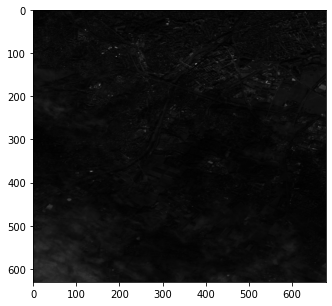

{'id': '7e653a2d-129d-44f0-a92a-9fc0c5d4b48f', 'title': 'S2A_MSIL2A_20191202T105421_N0213_R051_T31UDQ_20191202T122334', 'size': 1115360955, 'md5': '06E9BE62B2B5DEED37AD95B4EA2914F5', 'date': datetime.datetime(2019, 12, 2, 10, 54, 21, 24000), 'footprint': 'POLYGON((1.614272368185704 49.64443007346099,3.135213595780942 49.652643868751746,3.132551327123652 48.66495515183609,1.641546225080212 48.6570207750582,1.614272368185704 49.64443007346099))', 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('7e653a2d-129d-44f0-a92a-9fc0c5d4b48f')/$value", 'Online': True, 'Creation Date': datetime.datetime(2019, 12, 2, 19, 16, 13, 95000), 'Ingestion Date': datetime.datetime(2019, 12, 2, 19, 13, 43, 733000), 'Aot retrieval accuracy': 0.0, 'Cloud cover percentage': 49.322434, 'Cloud shadow percentage': 4.088915, 'Dark features percentage': 7.379208, 'Date': datetime.datetime(2019, 12, 2, 10, 54, 21, 24000), 'Degraded ancillary data percentage': 0.0, 'Degraded MSI data percentage': 0, 'Filenam

Downloading: 100%|██████████| 1.12G/1.12G [05:06<00:00, 3.63MB/s]
MD5 checksumming: 100%|██████████| 1.12G/1.12G [00:02<00:00, 416MB/s]


['S2A_MSIL2A_20191202T105421_N0213_R051_T31UDQ_20191202T122334.SAFE/GRANULE/L2A_T31UDQ_A023214_20191202T105436/IMG_DATA/R10m/T31UDQ_20191202T105421_B08_10m.tif', 'S2A_MSIL2A_20191202T105421_N0213_R051_T31UDQ_20191202T122334.SAFE/GRANULE/L2A_T31UDQ_A023214_20191202T105436/IMG_DATA/R10m/T31UDQ_20191202T105421_AOT_10m.tif', 'S2A_MSIL2A_20191202T105421_N0213_R051_T31UDQ_20191202T122334.SAFE/GRANULE/L2A_T31UDQ_A023214_20191202T105436/IMG_DATA/R10m/T31UDQ_20191202T105421_TCI_10m.tif', 'S2A_MSIL2A_20191202T105421_N0213_R051_T31UDQ_20191202T122334.SAFE/GRANULE/L2A_T31UDQ_A023214_20191202T105436/IMG_DATA/R10m/T31UDQ_20191202T105421_B02_10m.tif', 'S2A_MSIL2A_20191202T105421_N0213_R051_T31UDQ_20191202T122334.SAFE/GRANULE/L2A_T31UDQ_A023214_20191202T105436/IMG_DATA/R10m/T31UDQ_20191202T105421_B03_10m.tif', 'S2A_MSIL2A_20191202T105421_N0213_R051_T31UDQ_20191202T122334.SAFE/GRANULE/L2A_T31UDQ_A023214_20191202T105436/IMG_DATA/R10m/T31UDQ_20191202T105421_WVP_10m.tif', 'S2A_MSIL2A_20191202T105421_N0213

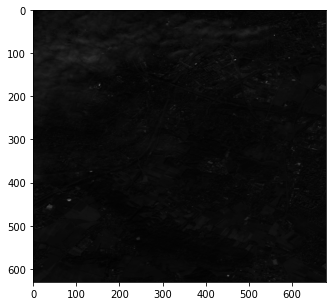

{'id': 'dceb43fd-d46a-424b-a16e-178fce6926c1', 'title': 'S2B_MSIL1C_20191207T105329_N0208_R051_T31UDQ_20191207T113305', 'size': 828688820, 'md5': 'FC446D3ABF21F059082DB24B0B3E1DFE', 'date': datetime.datetime(2019, 12, 7, 10, 53, 29, 24000), 'footprint': 'POLYGON((1.614272368185704 49.64443007346099,3.135213595780942 49.652643868751746,3.132551327123652 48.66495515183609,1.641546225080212 48.6570207750582,1.614272368185704 49.64443007346099))', 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('dceb43fd-d46a-424b-a16e-178fce6926c1')/$value", 'Online': True, 'Creation Date': datetime.datetime(2019, 12, 7, 14, 33, 4, 850000), 'Ingestion Date': datetime.datetime(2019, 12, 7, 14, 32, 24, 135000), 'Cloud cover percentage': 54.8662, 'Datatake sensing start': datetime.datetime(2019, 12, 7, 10, 53, 29, 24000), 'Date': datetime.datetime(2019, 12, 7, 10, 53, 29, 24000), 'Degraded ancillary data percentage': 0.0, 'Degraded MSI data percentage': 0, 'Filename': 'S2B_MSIL1C_20191207T105329_

Downloading: 100%|██████████| 829M/829M [02:27<00:00, 5.63MB/s]
MD5 checksumming: 100%|██████████| 829M/829M [00:01<00:00, 419MB/s]


['S2B_MSIL1C_20191207T105329_N0208_R051_T31UDQ_20191207T113305.SAFE/GRANULE/L1C_T31UDQ_A014377_20191207T105330/IMG_DATA/T31UDQ_20191207T105329_B11.tif', 'S2B_MSIL1C_20191207T105329_N0208_R051_T31UDQ_20191207T113305.SAFE/GRANULE/L1C_T31UDQ_A014377_20191207T105330/IMG_DATA/T31UDQ_20191207T105329_B8A.tif', 'S2B_MSIL1C_20191207T105329_N0208_R051_T31UDQ_20191207T113305.SAFE/GRANULE/L1C_T31UDQ_A014377_20191207T105330/IMG_DATA/T31UDQ_20191207T105329_B05.tif', 'S2B_MSIL1C_20191207T105329_N0208_R051_T31UDQ_20191207T113305.SAFE/GRANULE/L1C_T31UDQ_A014377_20191207T105330/IMG_DATA/T31UDQ_20191207T105329_B01.tif', 'S2B_MSIL1C_20191207T105329_N0208_R051_T31UDQ_20191207T113305.SAFE/GRANULE/L1C_T31UDQ_A014377_20191207T105330/IMG_DATA/T31UDQ_20191207T105329_B07.tif', 'S2B_MSIL1C_20191207T105329_N0208_R051_T31UDQ_20191207T113305.SAFE/GRANULE/L1C_T31UDQ_A014377_20191207T105330/IMG_DATA/T31UDQ_20191207T105329_B10.tif', 'S2B_MSIL1C_20191207T105329_N0208_R051_T31UDQ_20191207T113305.SAFE/GRANULE/L1C_T31UDQ_A

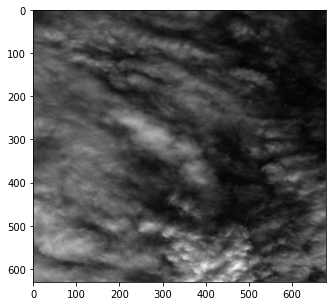

{'id': '2d175b5e-15db-44a9-84ad-66a966173ee4', 'title': 'S2B_MSIL1C_20191117T105229_N0208_R051_T31UDQ_20191117T125344', 'size': 841682233, 'md5': '6B3DEA3977C690F790EFB71ADE45E7F6', 'date': datetime.datetime(2019, 11, 17, 10, 52, 29, 24000), 'footprint': 'POLYGON((1.614272368185704 49.64443007346099,3.135213595780942 49.652643868751746,3.132551327123652 48.66495515183609,1.641546225080212 48.6570207750582,1.614272368185704 49.64443007346099))', 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('2d175b5e-15db-44a9-84ad-66a966173ee4')/$value", 'Online': True, 'Creation Date': datetime.datetime(2019, 11, 17, 17, 1, 10, 321000), 'Ingestion Date': datetime.datetime(2019, 11, 17, 16, 59, 56, 123000), 'Cloud cover percentage': 55.98500000000001, 'Datatake sensing start': datetime.datetime(2019, 11, 17, 10, 52, 29, 24000), 'Date': datetime.datetime(2019, 11, 17, 10, 52, 29, 24000), 'Degraded ancillary data percentage': 0.0, 'Degraded MSI data percentage': 0, 'Filename': 'S2B_MSIL1C_2

Downloading: 100%|██████████| 842M/842M [02:21<00:00, 5.97MB/s]
MD5 checksumming: 100%|██████████| 842M/842M [00:01<00:00, 422MB/s]


['S2B_MSIL1C_20191117T105229_N0208_R051_T31UDQ_20191117T125344.SAFE/GRANULE/L1C_T31UDQ_A014091_20191117T105529/IMG_DATA/T31UDQ_20191117T105229_B09.tif', 'S2B_MSIL1C_20191117T105229_N0208_R051_T31UDQ_20191117T125344.SAFE/GRANULE/L1C_T31UDQ_A014091_20191117T105529/IMG_DATA/T31UDQ_20191117T105229_B06.tif', 'S2B_MSIL1C_20191117T105229_N0208_R051_T31UDQ_20191117T125344.SAFE/GRANULE/L1C_T31UDQ_A014091_20191117T105529/IMG_DATA/T31UDQ_20191117T105229_B07.tif', 'S2B_MSIL1C_20191117T105229_N0208_R051_T31UDQ_20191117T125344.SAFE/GRANULE/L1C_T31UDQ_A014091_20191117T105529/IMG_DATA/T31UDQ_20191117T105229_B10.tif', 'S2B_MSIL1C_20191117T105229_N0208_R051_T31UDQ_20191117T125344.SAFE/GRANULE/L1C_T31UDQ_A014091_20191117T105529/IMG_DATA/T31UDQ_20191117T105229_B01.tif', 'S2B_MSIL1C_20191117T105229_N0208_R051_T31UDQ_20191117T125344.SAFE/GRANULE/L1C_T31UDQ_A014091_20191117T105529/IMG_DATA/T31UDQ_20191117T105229_TCI.tif', 'S2B_MSIL1C_20191117T105229_N0208_R051_T31UDQ_20191117T125344.SAFE/GRANULE/L1C_T31UDQ_A

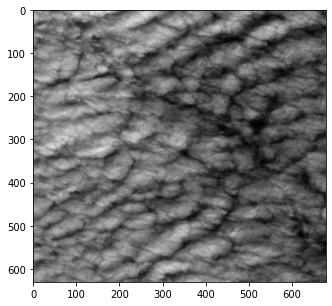

{'id': '7ccfc181-4446-4316-bd9c-3623846193d4', 'title': 'S2A_MSIL2A_20191122T105351_N0213_R051_T31UDQ_20191122T121918', 'size': 1098630674, 'md5': 'D63FC506A62A320FCBAC5822B4B0105F', 'date': datetime.datetime(2019, 11, 22, 10, 53, 51, 24000), 'footprint': 'POLYGON((1.614272368185704 49.64443007346099,3.135213595780942 49.652643868751746,3.132551327123652 48.66495515183609,1.641546225080212 48.6570207750582,1.614272368185704 49.64443007346099))', 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('7ccfc181-4446-4316-bd9c-3623846193d4')/$value", 'Online': True, 'Creation Date': datetime.datetime(2019, 11, 22, 18, 44, 6, 147000), 'Ingestion Date': datetime.datetime(2019, 11, 22, 18, 43, 10, 391000), 'Aot retrieval accuracy': 0.0, 'Cloud cover percentage': 57.143656, 'Cloud shadow percentage': 1.636901, 'Dark features percentage': 6.772363999999999, 'Date': datetime.datetime(2019, 11, 22, 10, 53, 51, 24000), 'Degraded ancillary data percentage': 0.0, 'Degraded MSI data percentage'

Downloading: 100%|██████████| 1.10G/1.10G [03:17<00:00, 5.58MB/s]
MD5 checksumming: 100%|██████████| 1.10G/1.10G [00:02<00:00, 413MB/s]


['S2A_MSIL2A_20191122T105351_N0213_R051_T31UDQ_20191122T121918.SAFE/GRANULE/L2A_T31UDQ_A023071_20191122T105436/IMG_DATA/R10m/T31UDQ_20191122T105351_B02_10m.tif', 'S2A_MSIL2A_20191122T105351_N0213_R051_T31UDQ_20191122T121918.SAFE/GRANULE/L2A_T31UDQ_A023071_20191122T105436/IMG_DATA/R10m/T31UDQ_20191122T105351_B03_10m.tif', 'S2A_MSIL2A_20191122T105351_N0213_R051_T31UDQ_20191122T121918.SAFE/GRANULE/L2A_T31UDQ_A023071_20191122T105436/IMG_DATA/R10m/T31UDQ_20191122T105351_WVP_10m.tif', 'S2A_MSIL2A_20191122T105351_N0213_R051_T31UDQ_20191122T121918.SAFE/GRANULE/L2A_T31UDQ_A023071_20191122T105436/IMG_DATA/R10m/T31UDQ_20191122T105351_B04_10m.tif', 'S2A_MSIL2A_20191122T105351_N0213_R051_T31UDQ_20191122T121918.SAFE/GRANULE/L2A_T31UDQ_A023071_20191122T105436/IMG_DATA/R10m/T31UDQ_20191122T105351_B08_10m.tif', 'S2A_MSIL2A_20191122T105351_N0213_R051_T31UDQ_20191122T121918.SAFE/GRANULE/L2A_T31UDQ_A023071_20191122T105436/IMG_DATA/R10m/T31UDQ_20191122T105351_TCI_10m.tif', 'S2A_MSIL2A_20191122T105351_N0213

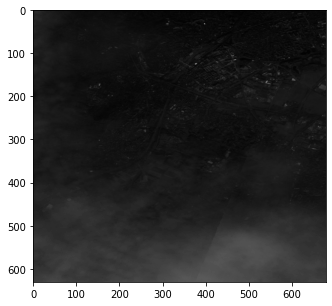

{'id': '78f8bd02-4d56-4b0f-9d8f-77f45e5d2f3e', 'title': 'S2A_MSIL2A_20191122T105351_N0213_R051_T31UDP_20191122T121918', 'size': 1083446696, 'md5': 'CDCD50BFC75CFBD4B102E4C428CC477D', 'date': datetime.datetime(2019, 11, 22, 10, 53, 51, 24000), 'footprint': 'POLYGON((1.639176802247361 48.74497768846318,3.132782609970735 48.75293650976542,3.130248809843976 47.765092664464426,1.665135068084716 47.757403531734624,1.639176802247361 48.74497768846318))', 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('78f8bd02-4d56-4b0f-9d8f-77f45e5d2f3e')/$value", 'Online': True, 'Creation Date': datetime.datetime(2019, 11, 22, 18, 44, 5, 513000), 'Ingestion Date': datetime.datetime(2019, 11, 22, 18, 43, 9, 543000), 'Aot retrieval accuracy': 0.0, 'Cloud cover percentage': 57.203484, 'Cloud shadow percentage': 0.545231, 'Dark features percentage': 6.869543, 'Date': datetime.datetime(2019, 11, 22, 10, 53, 51, 24000), 'Degraded ancillary data percentage': 0.0, 'Degraded MSI data percentage': 0, 'Fi

Downloading: 100%|██████████| 1.08G/1.08G [03:04<00:00, 5.88MB/s]
MD5 checksumming: 100%|██████████| 1.08G/1.08G [00:02<00:00, 414MB/s]


['S2A_MSIL2A_20191122T105351_N0213_R051_T31UDP_20191122T121918.SAFE/GRANULE/L2A_T31UDP_A023071_20191122T105436/IMG_DATA/R10m/T31UDP_20191122T105351_B02_10m.tif', 'S2A_MSIL2A_20191122T105351_N0213_R051_T31UDP_20191122T121918.SAFE/GRANULE/L2A_T31UDP_A023071_20191122T105436/IMG_DATA/R10m/T31UDP_20191122T105351_AOT_10m.tif', 'S2A_MSIL2A_20191122T105351_N0213_R051_T31UDP_20191122T121918.SAFE/GRANULE/L2A_T31UDP_A023071_20191122T105436/IMG_DATA/R10m/T31UDP_20191122T105351_B08_10m.tif', 'S2A_MSIL2A_20191122T105351_N0213_R051_T31UDP_20191122T121918.SAFE/GRANULE/L2A_T31UDP_A023071_20191122T105436/IMG_DATA/R10m/T31UDP_20191122T105351_WVP_10m.tif', 'S2A_MSIL2A_20191122T105351_N0213_R051_T31UDP_20191122T121918.SAFE/GRANULE/L2A_T31UDP_A023071_20191122T105436/IMG_DATA/R10m/T31UDP_20191122T105351_TCI_10m.tif', 'S2A_MSIL2A_20191122T105351_N0213_R051_T31UDP_20191122T121918.SAFE/GRANULE/L2A_T31UDP_A023071_20191122T105436/IMG_DATA/R10m/T31UDP_20191122T105351_B04_10m.tif', 'S2A_MSIL2A_20191122T105351_N0213

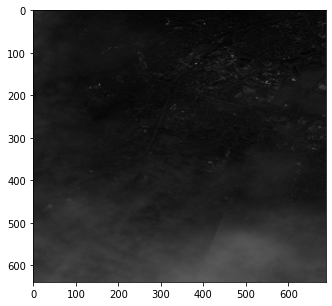

{'id': '77618639-7b4d-4f04-b6fb-a6dbca6f777e', 'title': 'S2A_MSIL2A_20191105T110231_N0213_R094_T31UDP_20191105T121918', 'size': 463429130, 'md5': 'DEFF70F46EEE591A244528B408251BD0', 'date': datetime.datetime(2019, 11, 5, 11, 2, 31, 24000), 'footprint': 'POLYGON((2.536900423517568 48.7497612945817,2.515797763733682 48.70399649932036,2.44884908048533 48.5593608695937,2.382210902017539 48.41462940839083,2.315640204794057 48.26989453422917,2.249477955416455 48.12502742940882,2.183394949340354 47.98017243190276,2.11787992250689 47.835222585313005,2.083740176898124 47.759600433006725,1.665135068084716 47.757403531734624,1.639176802247361 48.74497768846318,2.536900423517568 48.7497612945817))', 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('77618639-7b4d-4f04-b6fb-a6dbca6f777e')/$value", 'Online': True, 'Creation Date': datetime.datetime(2019, 11, 5, 19, 34, 2, 979000), 'Ingestion Date': datetime.datetime(2019, 11, 5, 19, 31, 58, 311000), 'Aot retrieval accuracy': 0.0, 'Cloud co

Downloading: 100%|██████████| 463M/463M [02:07<00:00, 3.63MB/s]
MD5 checksumming: 100%|██████████| 463M/463M [00:01<00:00, 424MB/s]


['S2A_MSIL2A_20191105T110231_N0213_R094_T31UDP_20191105T121918.SAFE/GRANULE/L2A_T31UDP_A022828_20191105T110442/IMG_DATA/R10m/T31UDP_20191105T110231_B08_10m.tif', 'S2A_MSIL2A_20191105T110231_N0213_R094_T31UDP_20191105T121918.SAFE/GRANULE/L2A_T31UDP_A022828_20191105T110442/IMG_DATA/R10m/T31UDP_20191105T110231_TCI_10m.tif', 'S2A_MSIL2A_20191105T110231_N0213_R094_T31UDP_20191105T121918.SAFE/GRANULE/L2A_T31UDP_A022828_20191105T110442/IMG_DATA/R10m/T31UDP_20191105T110231_WVP_10m.tif', 'S2A_MSIL2A_20191105T110231_N0213_R094_T31UDP_20191105T121918.SAFE/GRANULE/L2A_T31UDP_A022828_20191105T110442/IMG_DATA/R10m/T31UDP_20191105T110231_B03_10m.tif', 'S2A_MSIL2A_20191105T110231_N0213_R094_T31UDP_20191105T121918.SAFE/GRANULE/L2A_T31UDP_A022828_20191105T110442/IMG_DATA/R10m/T31UDP_20191105T110231_B04_10m.tif', 'S2A_MSIL2A_20191105T110231_N0213_R094_T31UDP_20191105T121918.SAFE/GRANULE/L2A_T31UDP_A022828_20191105T110442/IMG_DATA/R10m/T31UDP_20191105T110231_B02_10m.tif', 'S2A_MSIL2A_20191105T110231_N0213

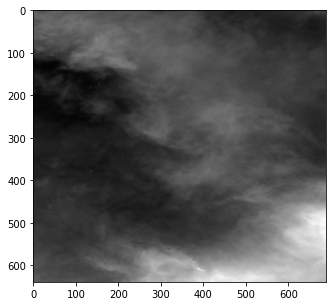

{'id': '5f53a512-252b-467e-b65e-778cb5aafb50', 'title': 'S2A_MSIL1C_20191105T110231_N0208_R094_T31UDP_20191105T113410', 'size': 347164864, 'md5': '9EF19F8AF86AAE31EA626C632D69C968', 'date': datetime.datetime(2019, 11, 5, 11, 2, 31, 24000), 'footprint': 'POLYGON((2.536900423517568 48.7497612945817,2.515797763733682 48.70399649932036,2.44884908048533 48.5593608695937,2.382210902017539 48.41462940839083,2.315640204794057 48.26989453422917,2.249477955416455 48.12502742940882,2.183394949340354 47.98017243190276,2.11787992250689 47.835222585313005,2.083740176898124 47.759600433006725,1.665135068084716 47.757403531734624,1.639176802247361 48.74497768846318,2.536900423517568 48.7497612945817))', 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('5f53a512-252b-467e-b65e-778cb5aafb50')/$value", 'Online': True, 'Creation Date': datetime.datetime(2019, 11, 5, 14, 46, 6, 622000), 'Ingestion Date': datetime.datetime(2019, 11, 5, 14, 45, 44, 131000), 'Cloud cover percentage': 60.38760000000

Downloading: 100%|██████████| 347M/347M [01:04<00:00, 5.40MB/s]
MD5 checksumming: 100%|██████████| 347M/347M [00:00<00:00, 413MB/s]


['S2A_MSIL1C_20191105T110231_N0208_R094_T31UDP_20191105T113410.SAFE/GRANULE/L1C_T31UDP_A022828_20191105T110442/IMG_DATA/T31UDP_20191105T110231_B05.tif', 'S2A_MSIL1C_20191105T110231_N0208_R094_T31UDP_20191105T113410.SAFE/GRANULE/L1C_T31UDP_A022828_20191105T110442/IMG_DATA/T31UDP_20191105T110231_B03.tif', 'S2A_MSIL1C_20191105T110231_N0208_R094_T31UDP_20191105T113410.SAFE/GRANULE/L1C_T31UDP_A022828_20191105T110442/IMG_DATA/T31UDP_20191105T110231_B01.tif', 'S2A_MSIL1C_20191105T110231_N0208_R094_T31UDP_20191105T113410.SAFE/GRANULE/L1C_T31UDP_A022828_20191105T110442/IMG_DATA/T31UDP_20191105T110231_B04.tif', 'S2A_MSIL1C_20191105T110231_N0208_R094_T31UDP_20191105T113410.SAFE/GRANULE/L1C_T31UDP_A022828_20191105T110442/IMG_DATA/T31UDP_20191105T110231_B07.tif', 'S2A_MSIL1C_20191105T110231_N0208_R094_T31UDP_20191105T113410.SAFE/GRANULE/L1C_T31UDP_A022828_20191105T110442/IMG_DATA/T31UDP_20191105T110231_B09.tif', 'S2A_MSIL1C_20191105T110231_N0208_R094_T31UDP_20191105T113410.SAFE/GRANULE/L1C_T31UDP_A

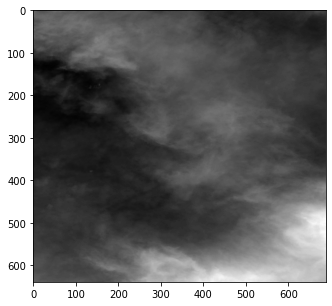

{'id': 'ece28fd2-bf7c-4cb6-8c2f-35d451619431', 'title': 'S2A_MSIL1C_20191122T105351_N0208_R051_T31UDQ_20191122T112943', 'size': 829747720, 'md5': '86DED4E2D008C3C0BE433B3DFE630209', 'date': datetime.datetime(2019, 11, 22, 10, 53, 51, 24000), 'footprint': 'POLYGON((1.614272368185704 49.64443007346099,3.135213595780942 49.652643868751746,3.132551327123652 48.66495515183609,1.641546225080212 48.6570207750582,1.614272368185704 49.64443007346099))', 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('ece28fd2-bf7c-4cb6-8c2f-35d451619431')/$value", 'Online': True, 'Creation Date': datetime.datetime(2019, 11, 22, 13, 44, 8, 492000), 'Ingestion Date': datetime.datetime(2019, 11, 22, 13, 43, 29, 876000), 'Cloud cover percentage': 60.7204, 'Datatake sensing start': datetime.datetime(2019, 11, 22, 10, 53, 51, 24000), 'Date': datetime.datetime(2019, 11, 22, 10, 53, 51, 24000), 'Degraded ancillary data percentage': 0.0, 'Degraded MSI data percentage': 0, 'Filename': 'S2A_MSIL1C_20191122T10

Downloading: 100%|██████████| 830M/830M [01:36<00:00, 8.63MB/s]
MD5 checksumming: 100%|██████████| 830M/830M [00:01<00:00, 416MB/s]


['S2A_MSIL1C_20191122T105351_N0208_R051_T31UDQ_20191122T112943.SAFE/GRANULE/L1C_T31UDQ_A023071_20191122T105436/IMG_DATA/T31UDQ_20191122T105351_B04.tif', 'S2A_MSIL1C_20191122T105351_N0208_R051_T31UDQ_20191122T112943.SAFE/GRANULE/L1C_T31UDQ_A023071_20191122T105436/IMG_DATA/T31UDQ_20191122T105351_B08.tif', 'S2A_MSIL1C_20191122T105351_N0208_R051_T31UDQ_20191122T112943.SAFE/GRANULE/L1C_T31UDQ_A023071_20191122T105436/IMG_DATA/T31UDQ_20191122T105351_TCI.tif', 'S2A_MSIL1C_20191122T105351_N0208_R051_T31UDQ_20191122T112943.SAFE/GRANULE/L1C_T31UDQ_A023071_20191122T105436/IMG_DATA/T31UDQ_20191122T105351_B12.tif', 'S2A_MSIL1C_20191122T105351_N0208_R051_T31UDQ_20191122T112943.SAFE/GRANULE/L1C_T31UDQ_A023071_20191122T105436/IMG_DATA/T31UDQ_20191122T105351_B05.tif', 'S2A_MSIL1C_20191122T105351_N0208_R051_T31UDQ_20191122T112943.SAFE/GRANULE/L1C_T31UDQ_A023071_20191122T105436/IMG_DATA/T31UDQ_20191122T105351_B11.tif', 'S2A_MSIL1C_20191122T105351_N0208_R051_T31UDQ_20191122T112943.SAFE/GRANULE/L1C_T31UDQ_A

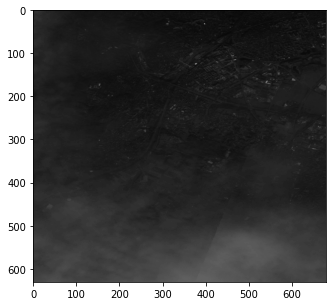

{'id': '304feca6-75d0-4dd1-901e-cc943b698a6a', 'title': 'S2B_MSIL2A_20191117T105229_N0213_R051_T31UDQ_20191117T134337', 'size': 1083763892, 'md5': 'AAB85947DB66104851ECF95DE2CBD997', 'date': datetime.datetime(2019, 11, 17, 10, 52, 29, 24000), 'footprint': 'POLYGON((1.614272368185704 49.64443007346099,3.135213595780942 49.652643868751746,3.132551327123652 48.66495515183609,1.641546225080212 48.6570207750582,1.614272368185704 49.64443007346099))', 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('304feca6-75d0-4dd1-901e-cc943b698a6a')/$value", 'Online': True, 'Creation Date': datetime.datetime(2019, 11, 17, 19, 20, 4, 585000), 'Ingestion Date': datetime.datetime(2019, 11, 17, 19, 18, 53, 450000), 'Aot retrieval accuracy': 0.0, 'Cloud cover percentage': 60.994722, 'Cloud shadow percentage': 0.7842520000000001, 'Dark features percentage': 2.8402220000000002, 'Date': datetime.datetime(2019, 11, 17, 10, 52, 29, 24000), 'Degraded ancillary data percentage': 0.0, 'Degraded MSI data 

Downloading: 100%|██████████| 1.08G/1.08G [03:51<00:00, 4.68MB/s]
MD5 checksumming: 100%|██████████| 1.08G/1.08G [00:02<00:00, 417MB/s]


['S2B_MSIL2A_20191117T105229_N0213_R051_T31UDQ_20191117T134337.SAFE/GRANULE/L2A_T31UDQ_A014091_20191117T105529/IMG_DATA/R10m/T31UDQ_20191117T105229_B02_10m.tif', 'S2B_MSIL2A_20191117T105229_N0213_R051_T31UDQ_20191117T134337.SAFE/GRANULE/L2A_T31UDQ_A014091_20191117T105529/IMG_DATA/R10m/T31UDQ_20191117T105229_B08_10m.tif', 'S2B_MSIL2A_20191117T105229_N0213_R051_T31UDQ_20191117T134337.SAFE/GRANULE/L2A_T31UDQ_A014091_20191117T105529/IMG_DATA/R10m/T31UDQ_20191117T105229_WVP_10m.tif', 'S2B_MSIL2A_20191117T105229_N0213_R051_T31UDQ_20191117T134337.SAFE/GRANULE/L2A_T31UDQ_A014091_20191117T105529/IMG_DATA/R10m/T31UDQ_20191117T105229_AOT_10m.tif', 'S2B_MSIL2A_20191117T105229_N0213_R051_T31UDQ_20191117T134337.SAFE/GRANULE/L2A_T31UDQ_A014091_20191117T105529/IMG_DATA/R10m/T31UDQ_20191117T105229_B04_10m.tif', 'S2B_MSIL2A_20191117T105229_N0213_R051_T31UDQ_20191117T134337.SAFE/GRANULE/L2A_T31UDQ_A014091_20191117T105529/IMG_DATA/R10m/T31UDQ_20191117T105229_TCI_10m.tif', 'S2B_MSIL2A_20191117T105229_N0213

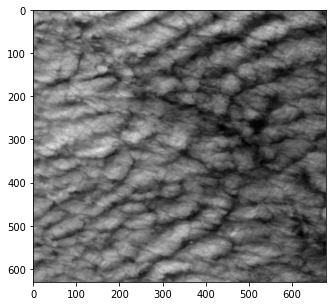

{'id': '94e372ff-0019-4c58-ba9b-7467dd36bf86', 'title': 'S2A_MSIL1C_20191125T110401_N0208_R094_T31UDP_20191125T112328', 'size': 348629707, 'md5': '181404913326AB7986AC856BAEC51712', 'date': datetime.datetime(2019, 11, 25, 11, 4, 1, 25000), 'footprint': 'POLYGON((2.541952254490664 48.74978821374589,2.506837192621727 48.67409558406657,2.440261033555816 48.529333476447945,2.37359855950832 48.384591727284686,2.306982712798447 48.23981784739848,2.240792377449714 48.09493254536744,2.174666840264726 47.949967604288034,2.108765750373824 47.80495425735245,2.088248776135157 47.75962409479964,1.665135068084716 47.757403531734624,1.639176802247361 48.74497768846318,2.541952254490664 48.74978821374589))', 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('94e372ff-0019-4c58-ba9b-7467dd36bf86')/$value", 'Online': True, 'Creation Date': datetime.datetime(2019, 11, 25, 13, 3, 25, 563000), 'Ingestion Date': datetime.datetime(2019, 11, 25, 13, 3, 5, 413000), 'Cloud cover percentage': 61.352499

Downloading: 100%|██████████| 349M/349M [00:50<00:00, 6.97MB/s]
MD5 checksumming: 100%|██████████| 349M/349M [00:00<00:00, 422MB/s]


['S2A_MSIL1C_20191125T110401_N0208_R094_T31UDP_20191125T112328.SAFE/GRANULE/L1C_T31UDP_A023114_20191125T110440/IMG_DATA/T31UDP_20191125T110401_B08.tif', 'S2A_MSIL1C_20191125T110401_N0208_R094_T31UDP_20191125T112328.SAFE/GRANULE/L1C_T31UDP_A023114_20191125T110440/IMG_DATA/T31UDP_20191125T110401_B06.tif', 'S2A_MSIL1C_20191125T110401_N0208_R094_T31UDP_20191125T112328.SAFE/GRANULE/L1C_T31UDP_A023114_20191125T110440/IMG_DATA/T31UDP_20191125T110401_B02.tif', 'S2A_MSIL1C_20191125T110401_N0208_R094_T31UDP_20191125T112328.SAFE/GRANULE/L1C_T31UDP_A023114_20191125T110440/IMG_DATA/T31UDP_20191125T110401_B05.tif', 'S2A_MSIL1C_20191125T110401_N0208_R094_T31UDP_20191125T112328.SAFE/GRANULE/L1C_T31UDP_A023114_20191125T110440/IMG_DATA/T31UDP_20191125T110401_B09.tif', 'S2A_MSIL1C_20191125T110401_N0208_R094_T31UDP_20191125T112328.SAFE/GRANULE/L1C_T31UDP_A023114_20191125T110440/IMG_DATA/T31UDP_20191125T110401_B04.tif', 'S2A_MSIL1C_20191125T110401_N0208_R094_T31UDP_20191125T112328.SAFE/GRANULE/L1C_T31UDP_A

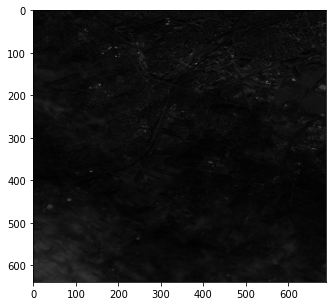

{'id': '7dbd3ca3-d106-4ae3-b048-411e868e64be', 'title': 'S2B_MSIL1C_20191117T105229_N0208_R051_T31UDP_20191117T125344', 'size': 839108955, 'md5': 'C0E995CCA797E7010CD3577CBF395928', 'date': datetime.datetime(2019, 11, 17, 10, 52, 29, 24000), 'footprint': 'POLYGON((1.639176802247361 48.74497768846318,3.132782609970735 48.75293650976542,3.130248809843976 47.765092664464426,1.665135068084716 47.757403531734624,1.639176802247361 48.74497768846318))', 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('7dbd3ca3-d106-4ae3-b048-411e868e64be')/$value", 'Online': True, 'Creation Date': datetime.datetime(2019, 11, 17, 16, 59, 34, 530000), 'Ingestion Date': datetime.datetime(2019, 11, 17, 16, 58, 9, 919000), 'Cloud cover percentage': 63.1843, 'Datatake sensing start': datetime.datetime(2019, 11, 17, 10, 52, 29, 24000), 'Date': datetime.datetime(2019, 11, 17, 10, 52, 29, 24000), 'Degraded ancillary data percentage': 0.0, 'Degraded MSI data percentage': 0, 'Filename': 'S2B_MSIL1C_20191117T

Downloading: 100%|██████████| 839M/839M [02:21<00:00, 5.93MB/s]
MD5 checksumming: 100%|██████████| 839M/839M [00:01<00:00, 421MB/s]


['S2B_MSIL1C_20191117T105229_N0208_R051_T31UDP_20191117T125344.SAFE/GRANULE/L1C_T31UDP_A014091_20191117T105529/IMG_DATA/T31UDP_20191117T105229_B11.tif', 'S2B_MSIL1C_20191117T105229_N0208_R051_T31UDP_20191117T125344.SAFE/GRANULE/L1C_T31UDP_A014091_20191117T105529/IMG_DATA/T31UDP_20191117T105229_B03.tif', 'S2B_MSIL1C_20191117T105229_N0208_R051_T31UDP_20191117T125344.SAFE/GRANULE/L1C_T31UDP_A014091_20191117T105529/IMG_DATA/T31UDP_20191117T105229_B8A.tif', 'S2B_MSIL1C_20191117T105229_N0208_R051_T31UDP_20191117T125344.SAFE/GRANULE/L1C_T31UDP_A014091_20191117T105529/IMG_DATA/T31UDP_20191117T105229_B12.tif', 'S2B_MSIL1C_20191117T105229_N0208_R051_T31UDP_20191117T125344.SAFE/GRANULE/L1C_T31UDP_A014091_20191117T105529/IMG_DATA/T31UDP_20191117T105229_B06.tif', 'S2B_MSIL1C_20191117T105229_N0208_R051_T31UDP_20191117T125344.SAFE/GRANULE/L1C_T31UDP_A014091_20191117T105529/IMG_DATA/T31UDP_20191117T105229_B01.tif', 'S2B_MSIL1C_20191117T105229_N0208_R051_T31UDP_20191117T125344.SAFE/GRANULE/L1C_T31UDP_A

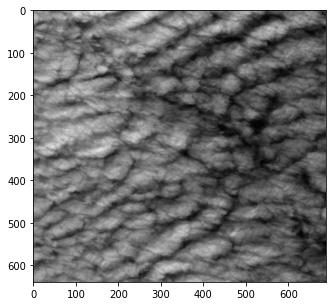

In [ ]:
import zipfile


#if true request max 5 offline products from query for later download, else only download currently online products.
offline = False

#here is where you can change the amount of days before and after the specified date the program will search
time_buffer = 20

#reads the geojson
footprint = geojson_to_wkt(read_geojson(list(geojson.keys())[0]))

#uses footprint and other search criteria to search for images.
products = api.query(footprint,
                     date=(date1 - timedelta(days=time_buffer) , date1 + timedelta(days=time_buffer)),
                     platformname='Sentinel-2',
                     cloudcoverpercentage=(0,100))


products_df = api.to_dataframe(products)



#sorts data to top 6 results
products_df_sorted = products_df.sort_values(['cloudcoverpercentage', 'ingestiondate'], ascending=[True, True])
products_df_sorted = products_df_sorted.head(20) 

pd.set_option('display.max_columns', None)

print("top products found: ", products_df_sorted['title'])

count = 0
for id in products_df_sorted['uuid']:
  a = api.get_product_odata(id, full=True)
  print(a)
  if a['Online'] == True:
    print("product online and available to download: ", a['title'])
    api.download(id)
    #unzip the files
    with zipfile.ZipFile(a['title'] + '.zip', 'r') as zip_ref:
      zip_ref.extractall()
    os.remove(a['title'] + '.zip')
    images = []
    import os
    #walk through dir and append files to list
    for root, dirs, files in os.walk(a['title'] + '.SAFE'):
        for file in files:
            if file.endswith(".jp2"):
                images.append(os.path.join(root, file))
    #this part takes a while, it is converting the entire image from jp2 to GeoTiff
    for image in images:
      #ds = gdal.Open(image)
      #ds = gdal.Translate(image[:-4] + '.tiff',image)
      #ds = None
      newimage = image[:-4] + '.tif'
      os.system('mv ' + image + ' ' + newimage)
      #os.remove(image)
    #del images  



    #takes geojson and extracts coordinates
    import json
    res_bytes = geojson[list(geojson.keys())[0]]
    res_dict = json.loads(res_bytes.decode('utf-8'))
    coords = res_dict['features'][0]['geometry']['coordinates']

    #walks through dir again finding the tiff files
    images = []
    check = True
    import os
    for root, dirs, files in os.walk(a['title'] + '.SAFE'):
      for dir in dirs:
        if dir.endswith("R10m"):
          check = False
          for file in os.listdir(root +'/'+ dir):
              images.append(os.path.join(root + '/'+ dir, file))
      if check == True:
        for file in files:
          if file.endswith('.tif'):
            images.append(os.path.join(root, file))
    print(images)
    coord1 = str(coords[0][0][0])
    coord2 = str(coords[0][0][1])
    coord3 = str(coords[0][2][0])
    coord4 = str(coords[0][2][1])
    
    os.mkdir(a['title'])
    i = 1
    #crops image
    if check == True:
      for image in images:
        os.system('gdalwarp -t_srs EPSG:4326 -te ' + coord1 + ' ' + coord2 + ' ' + coord3 + ' ' + coord4 + ' -overwrite ' + image + ' ' + a['title'] +"/" +image[-7:-4] + '.tif')
      
    else:  
      for image in images:
        os.system('gdalwarp -t_srs EPSG:4326 -te ' + coord1 + ' ' + coord2 + ' ' + coord3 + ' ' + coord4 + ' -overwrite ' + image + ' ' + a['title'] +"/" +image[-11:-8] + '.tif')

    from osgeo import gdal
    from matplotlib import pyplot as plt 
    import numpy as np
    ds = gdal.Open(a['title'] + '/B03.tif', gdal.GA_ReadOnly)
    rb = ds.GetRasterBand(1)
    img_array = rb.ReadAsArray()
    plt.rcParams['figure.figsize'] = [10, 5]
    plt.imshow(img_array, cmap = 'gray')
    plt.show()

  #request offline  products
  elif (offline == True) and (count < 5):
    api.download(id)
    count+=1 
  



Finds all jp2 files and stores them to a list

In [ ]:

import shutil
from google.colab import files
shutil.make_archive('after', 'zip', '/content/S2B_MSIL2A_20191107T105139_N0213_R051_T31UDQ_20191107T125325')

files.download('after.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
    from osgeo import gdal
    from matplotlib import pyplot as plt 
    import numpy as np
    ds = gdal.Open('/content/B02.tif', gdal.GA_ReadOnly)
    rb = ds.GetRasterBand(1)
    img_array = rb.ReadAsArray()
    plt.rcParams['figure.figsize'] = [10, 5]
    plt.imshow(img_array, cmap = 'gray')
    plt.show()



    from osgeo import gdal
    from matplotlib import pyplot as plt 
    import numpy as np
    ds = gdal.Open('/content/S2A_MSIL1C_20150830T082006_N0204_R121_T36SYC_20150830T082754/B3.tif', gdal.GA_ReadOnly)
    rb = ds.GetRasterBand(1)
    img_array = rb.ReadAsArray()
    plt.rcParams['figure.figsize'] = [10, 5]
    plt.imshow(img_array, cmap = 'gray')
    plt.show()


AttributeError: ignored